#### IMPORTS

In [1]:
import torch
import numpy as np

from dataloader import MyCustomDataset
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.optim as optim

import os
from model_nn import  Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
default_dir = os.getcwd()
def default_directory():
    os.chdir(f"{default_dir}")
    print(f"you are back to the default directory: {default_dir}")


In [3]:
default_directory()
os.getcwd()

you are back to the default directory: /home/karansingh/Documents/summer-term/ECG_ML/MAIN


'/home/karansingh/Documents/summer-term/ECG_ML/MAIN'

In [4]:
os.chdir("../../KARAN_ECG/ML/data 4_norm")
os.getcwd()

'/home/karansingh/Documents/summer-term/KARAN_ECG/ML/data 4_norm'

In [5]:
labels=[]

#merge two arrays albles and np.zeros(5000)
labels=np.concatenate((labels,np.zeros(5000)))

len(labels)

5000

#### LOAD DATA

In [6]:
## Create fake dataset for demonstration purposes

## Load your dataset and use 


data_ST_list = []
for i in range(10):
    cc = np.loadtxt('disease_ST_svd_'+str(i)+'.txt')
    data_ST_list.append(cc)
    print(f"data st of length {len(cc)} in {i} index loaded")


data_ST_list = np.array(data_ST_list)
images = np.resize(data_ST_list,(5000,10000))

lables=np.zeros(5000)

data_SB_list = []
for i in range(10):
    cc = np.loadtxt('disease_SB_svd_'+str(i)+'.txt')
    data_SB_list.append(cc)
    print(f"data sb of length {len(cc)} in {i} index loaded")
images = np.concatenate((images,np.resize(data_SB_list,(5000,10000))))
labels=np.concatenate((labels,np.ones(5000)))

data_SR_list = []
for i in range(10):
    cc = np.loadtxt('disease_SR_svd_'+str(i)+'.txt')
    data_SR_list.append(cc)
    print(f"data sr of length {len(cc)} in {i} index loaded")
images = np.concatenate((images,np.resize(data_SR_list,(5000,10000))))
labels=np.concatenate((labels,np.ones(5000)*2))
                    

data st of length 500 in 0 index loaded
data st of length 500 in 1 index loaded
data st of length 500 in 2 index loaded
data st of length 500 in 3 index loaded
data st of length 500 in 4 index loaded
data st of length 500 in 5 index loaded
data st of length 500 in 6 index loaded
data st of length 500 in 7 index loaded
data st of length 500 in 8 index loaded
data st of length 500 in 9 index loaded
data sb of length 500 in 0 index loaded
data sb of length 500 in 1 index loaded
data sb of length 500 in 2 index loaded
data sb of length 500 in 3 index loaded
data sb of length 500 in 4 index loaded
data sb of length 500 in 5 index loaded
data sb of length 500 in 6 index loaded
data sb of length 500 in 7 index loaded
data sb of length 500 in 8 index loaded
data sb of length 500 in 9 index loaded
data sr of length 500 in 0 index loaded
data sr of length 500 in 1 index loaded
data sr of length 500 in 2 index loaded
data sr of length 500 in 3 index loaded
data sr of length 500 in 4 index loaded


In [7]:
len(images),len(labels)

(15000, 15000)

#### CREATE BATCHES

In [8]:
# Create an instance of your dataset
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)
train_dataset = MyCustomDataset(images_train, labels_train)
test_dataset = MyCustomDataset(images_test, labels_test)
# Define a DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#### TRAINING PARAMETERS

In [9]:
torch.manual_seed(37)  # Set seed for reproducibility
model__ = Model()

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model__.parameters(), lr=0.001)  # Adam optimizer
def accuracy(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


#### TRAINING

In [10]:
torch.manual_seed(21)  # Set seed for reproducibility
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model__ = Model().to(device)

criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(model__.parameters(), lr=0.001)  # Adam optimizer

def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

num_epochs = 25
test_losses_list = []
train_losses_list = []
accuracy_train_list = []
accuracy_test_list = []

for epoch in range(num_epochs):
    model__.train()
    running_loss, accuracy_train = 0.0, 0.0
    for i, (images, labels) in enumerate(train_dataloader):
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model__(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        accuracy_train += accuracy(labels, outputs.argmax(dim=1))
    train_losses_list.append(running_loss / len(train_dataloader))
    
    # Just calculating the test loss and accuracy
    with torch.no_grad():
        model__.eval()
        test_loss, accuracy_test = 0.0, 0.0
        for i, (images, labels) in enumerate(test_dataloader):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model__(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            accuracy_test += accuracy(labels, outputs.argmax(dim=1))
    test_losses_list.append(test_loss / len(test_dataloader))
    
    accuracy_train_list.append(accuracy_train / len(train_dataloader))
    accuracy_test_list.append(accuracy_test / len(test_dataloader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')

Epoch [1/25], Train Loss: 1.1008, Test Loss: 1.1004, Train Accuracy: 33.4833, Test Accuracy: 32.4357
Epoch [2/25], Train Loss: 1.0973, Test Loss: 1.0982, Train Accuracy: 34.8417, Test Accuracy: 34.3307
Epoch [3/25], Train Loss: 1.0913, Test Loss: 1.0984, Train Accuracy: 37.7583, Test Accuracy: 34.5966
Epoch [4/25], Train Loss: 1.0374, Test Loss: 1.0102, Train Accuracy: 43.5417, Test Accuracy: 46.7753
Epoch [5/25], Train Loss: 0.8691, Test Loss: 0.8364, Train Accuracy: 57.5500, Test Accuracy: 58.2447
Epoch [6/25], Train Loss: 0.6964, Test Loss: 0.7750, Train Accuracy: 65.2667, Test Accuracy: 60.7824
Epoch [7/25], Train Loss: 0.5952, Test Loss: 0.8537, Train Accuracy: 70.0417, Test Accuracy: 62.8103
Epoch [8/25], Train Loss: 0.5322, Test Loss: 0.7057, Train Accuracy: 73.8917, Test Accuracy: 69.5590
Epoch [9/25], Train Loss: 0.3605, Test Loss: 0.4652, Train Accuracy: 84.7750, Test Accuracy: 85.3169
Epoch [10/25], Train Loss: 0.1868, Test Loss: 0.4877, Train Accuracy: 93.4500, Test Accurac

In [16]:
# save the model
default_directory()
torch.save(model__.state_dict(), 'model_v0.pth')



you are back to the default directory: /home/karansingh/Documents/summer-term/ECG_ML/MAIN


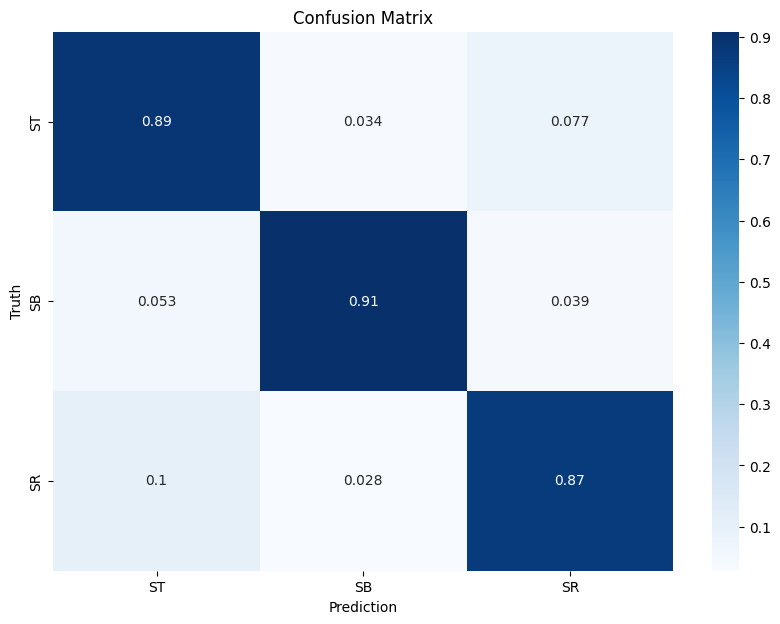

In [12]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

model__.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for images, labels in test_dataloader:
        outputs = model__(images.to(device))
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
cm = cm / cm.sum(axis=1)[:, np.newaxis]  # Normalize confusion matrix
df_cm = pd.DataFrame(cm, index=["ST", "SB", "SR"], columns=["ST", "SB", "SR"])
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()




In [13]:

#Classification Report for Test Data:

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=["ST", "SB", "SR"]))


              precision    recall  f1-score   support

          ST       0.86      0.89      0.87      1037
          SB       0.93      0.91      0.92       970
          SR       0.88      0.87      0.87       993

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000



Average precision score, micro-averaged over all classes: 0.83


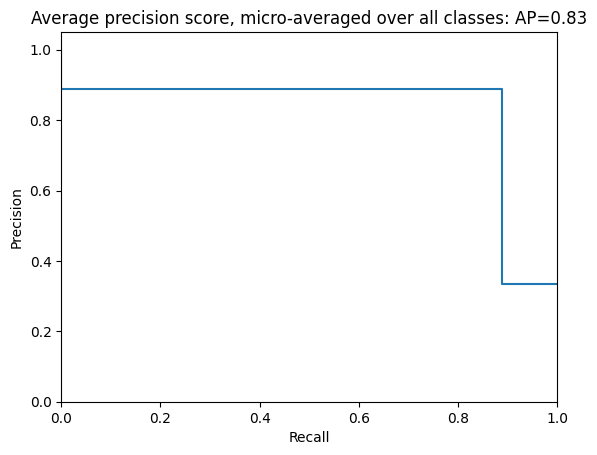

In [14]:
# presicion recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve((np.array(y_true) == i).astype(int),
                                                        (np.array(y_pred) == i).astype(int))
    average_precision[i] = average_precision_score((np.array(y_true) == i).astype(int), (np.array(y_pred) == i).astype(int))

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(np.eye(3)[y_true].ravel(),
    np.eye(3)[y_pred].ravel())
average_precision["micro"] = average_precision_score(np.eye(3)[y_true], np.eye(3)[y_pred],
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
        .format(average_precision["micro"]))
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))
plt.show()

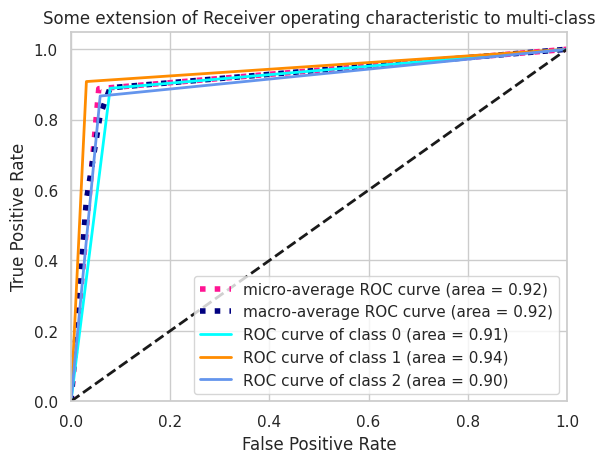

In [60]:
# ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_test = label_binarize(y_true, classes=[0, 1, 2])
y_score = label_binarize(y_pred, classes=[0, 1, 2])


n_classes = 3

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

colors = ['aqua', 'darkorange', 'cornflowerblue']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



you are back to the default directory: /home/karansingh/Documents/summer-term/ECG_ML/MAIN


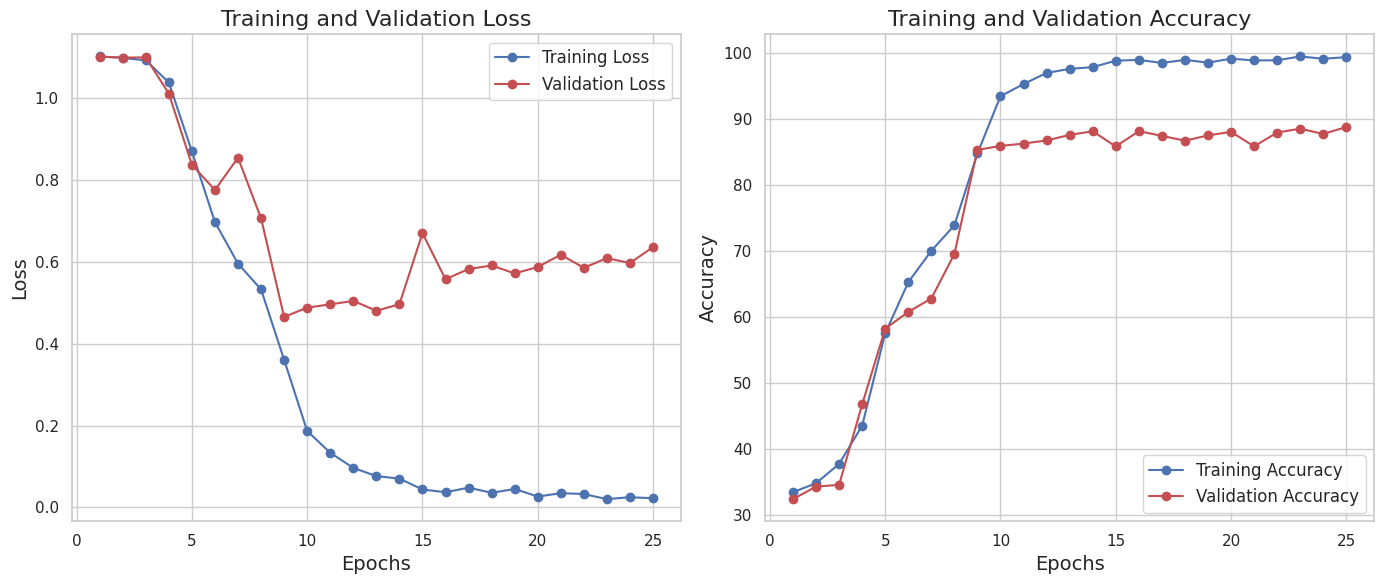

In [15]:
default_directory()
from plots import accuracy_and_validation_plots


# Example data: Replace these with your actual training and validation data
epochs_= list(range(1, len(train_losses_list)+1))

accuracy_and_validation_plots(epochs_, train_losses_list, test_losses_list, accuracy_train_list,accuracy_test_list).plot_figure("accuracy.png")


In [19]:
def model_train(train_dataloader, test_dataloader,n):
    torch.manual_seed(n)  # Set seed for reproducibility
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    model__ = Model().to(device)

    criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
    optimizer = optim.Adam(model__.parameters(), lr=0.001)  # Adam optimizer

    def accuracy(y_true, y_pred):
        correct = torch.eq(y_true, y_pred).sum().item()
        acc = (correct / len(y_pred)) * 100
        return acc

    num_epochs = 25
    test_losses_list = []
    train_losses_list = []
    accuracy_train_list = []
    accuracy_test_list = []

    for epoch in range(num_epochs):
        model__.train()
        running_loss, accuracy_train = 0.0, 0.0
        for i, (images, labels) in enumerate(train_dataloader):
            images, labels = images.to(device), labels.to(device)  # Move data to GPU
            outputs = model__(images)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            accuracy_train += accuracy(labels, outputs.argmax(dim=1))
        train_losses_list.append(running_loss / len(train_dataloader))
        
        # Just calculating the test loss and accuracy
        with torch.no_grad():
            model__.eval()
            test_loss, accuracy_test = 0.0, 0.0
            for i, (images, labels) in enumerate(test_dataloader):
                images, labels = images.to(device), labels.to(device)  # Move data to GPU
                outputs = model__(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                accuracy_test += accuracy(labels, outputs.argmax(dim=1))
        test_losses_list.append(test_loss / len(test_dataloader))
        
        accuracy_train_list.append(accuracy_train / len(train_dataloader))
        accuracy_test_list.append(accuracy_test / len(test_dataloader))

        #print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss / len(train_dataloader):.4f}, Test Loss: {test_loss / len(test_dataloader):.4f}, Train Accuracy: {accuracy_train / len(train_dataloader):.4f}, Test Accuracy: {accuracy_test / len(test_dataloader):.4f}')
    return train_losses_list, test_losses_list, accuracy_train_list, accuracy_test_list

## image

In [15]:
# open accuracy_seed_test.npy
accuracy_seed_test = np.load("accuracy_seed_test.npy").tolist()
accuracy_seed_train = np.load("accuracy_seed_train.npy").tolist()

In [16]:
# find the seed with minimum mse btw train and test
mse_list = []
for i in range(0, 60):
    mse = np.mean((np.array(accuracy_seed_train[i]) - np.array(accuracy_seed_test[i]))**2)
    mse_list.append(mse)
min_seed = np.argmin(mse_list)
print(f"Seed with minimum MSE between train and test: {min_seed}")


Seed with minimum MSE between train and test: 33


## test


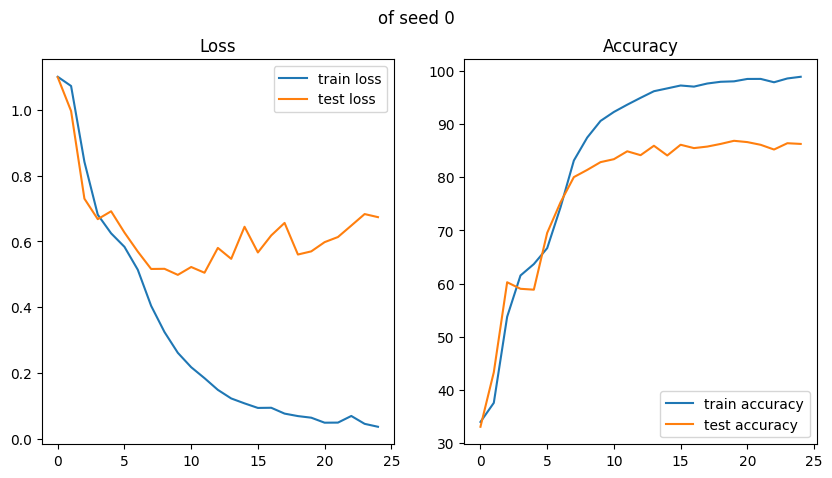

86.26994680851064


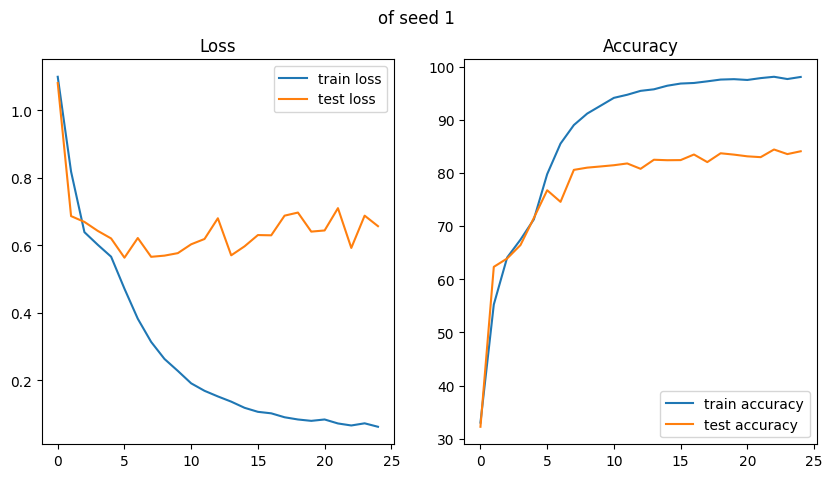

84.0979609929078


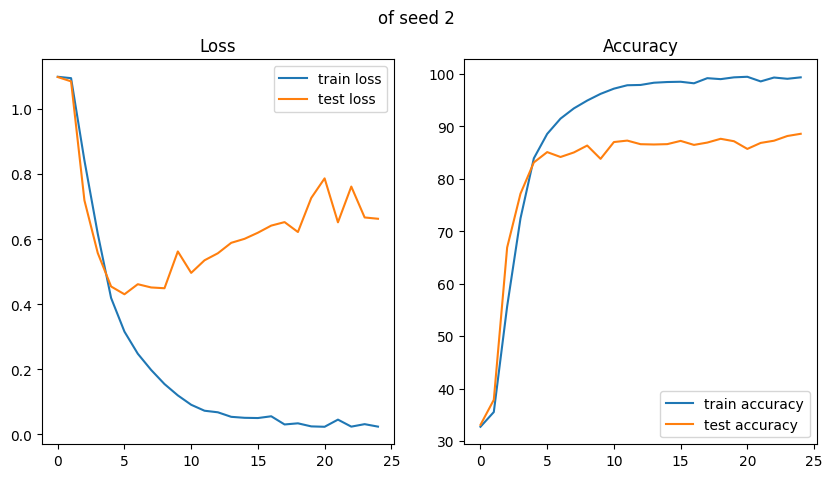

88.59707446808511


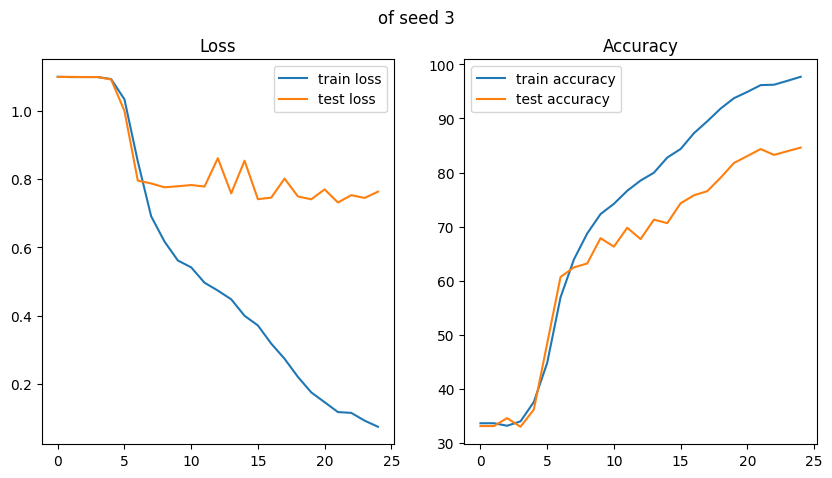

84.60771276595744


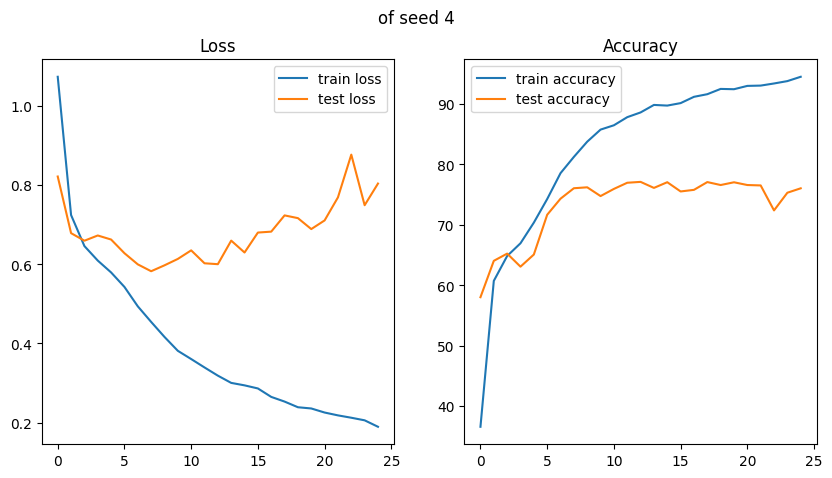

76.05274822695036


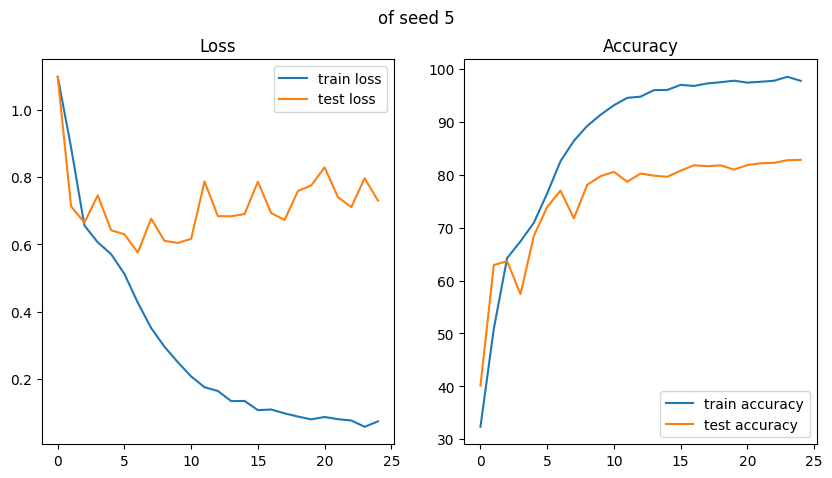

82.8125


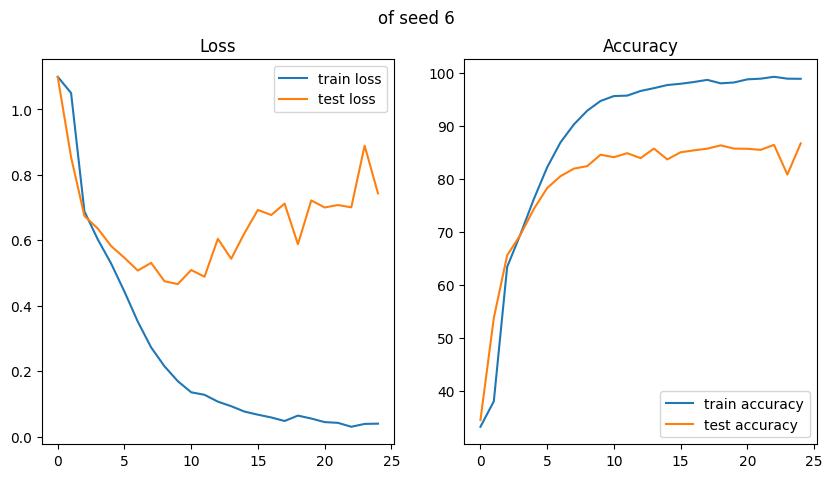

86.71320921985816


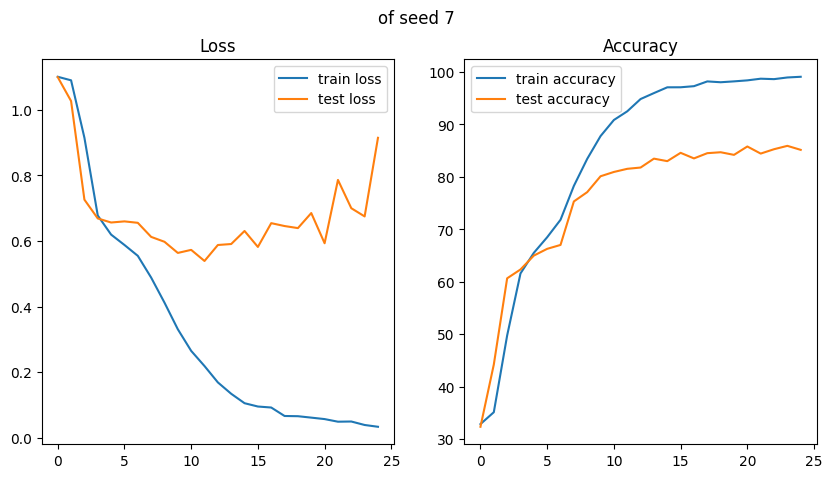

85.13962765957447


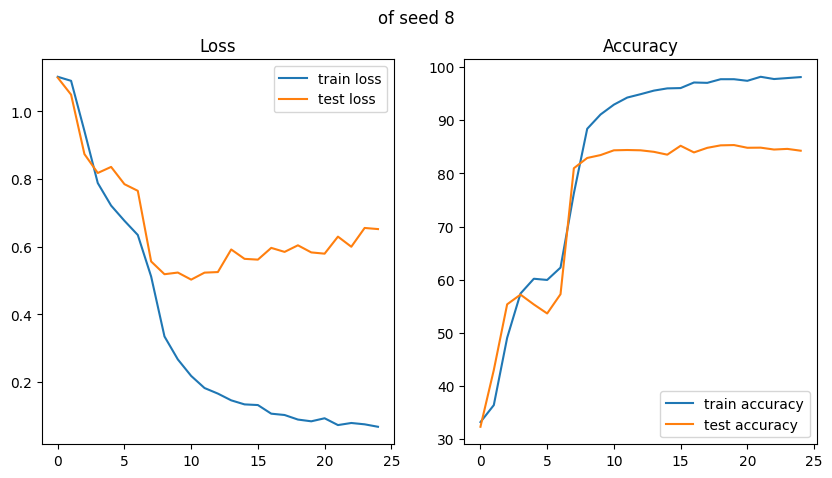

84.25310283687944


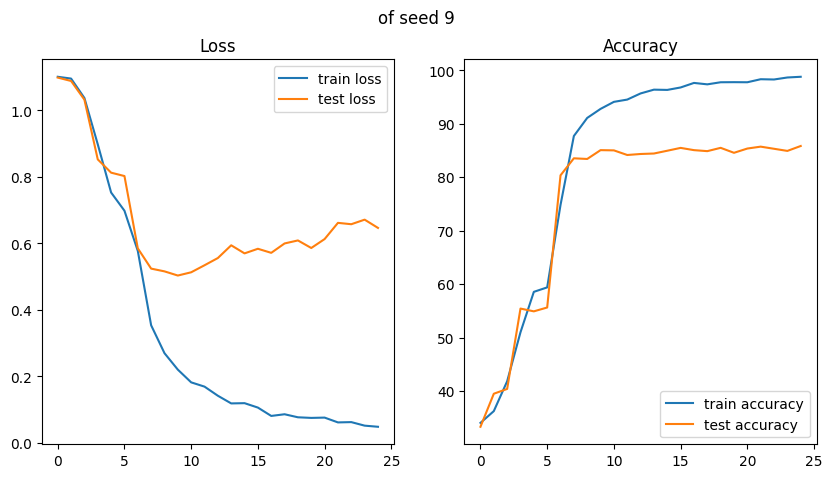

85.8488475177305


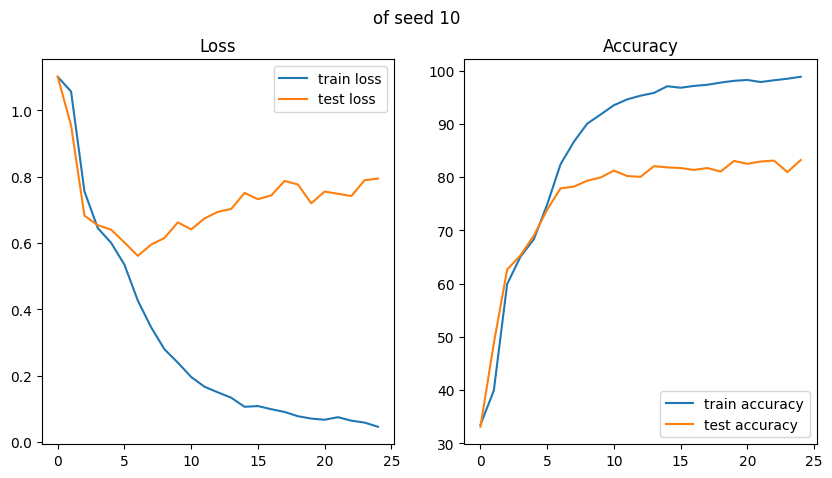

83.1892730496454


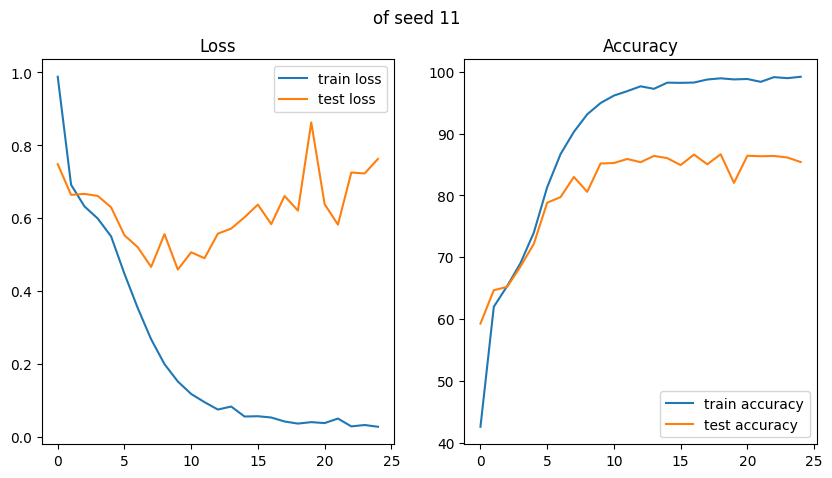

85.3834219858156


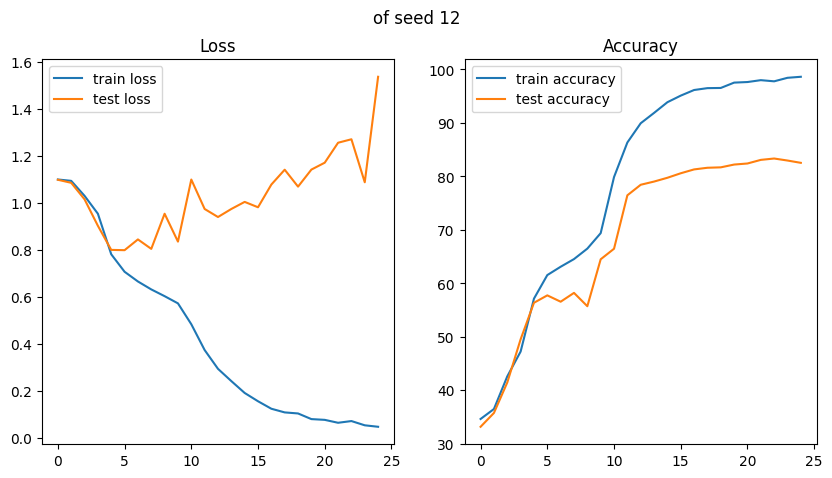

82.5354609929078


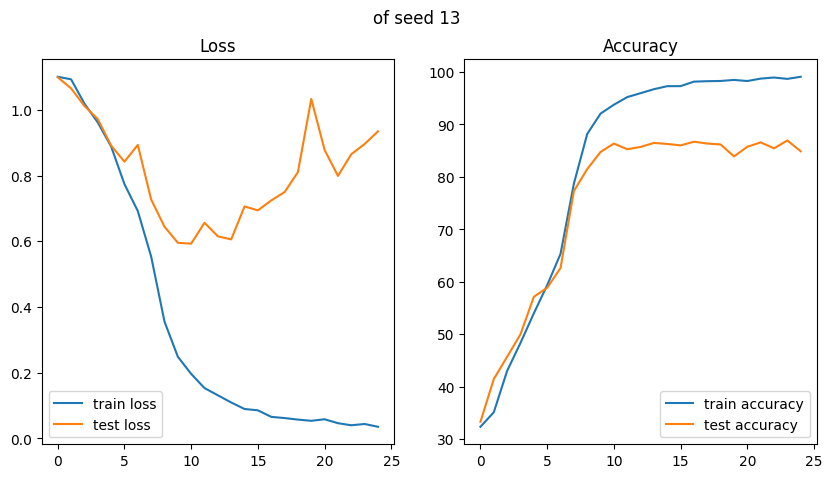

84.88475177304964


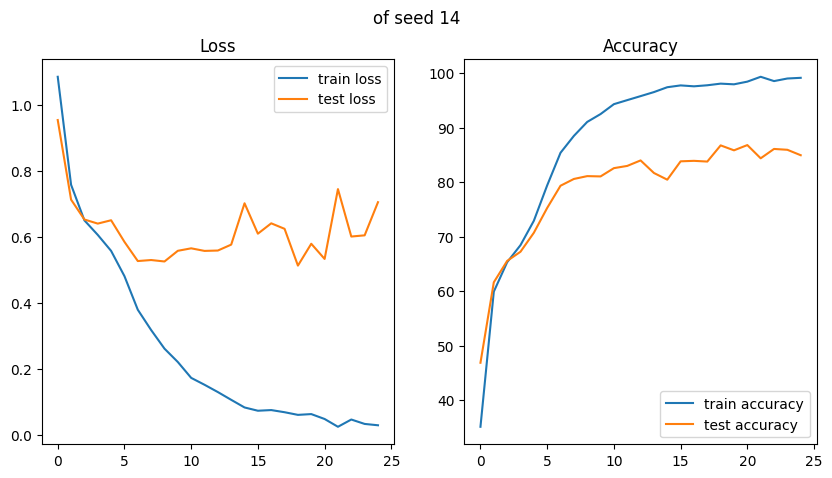

84.94015957446808


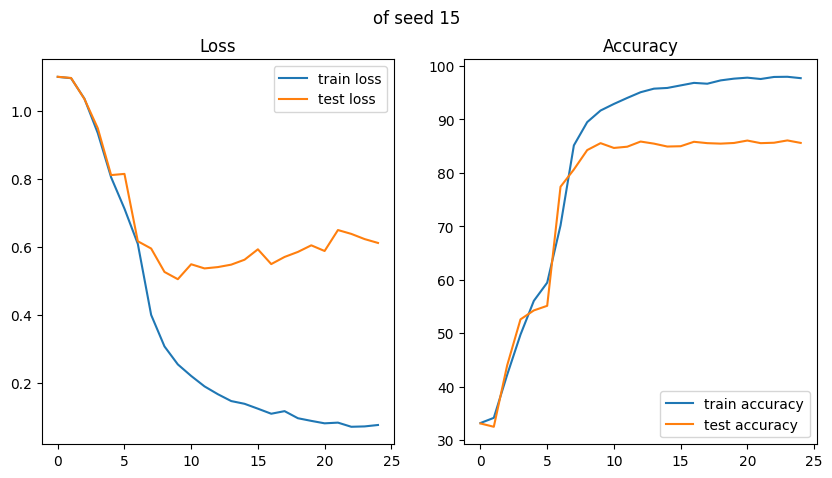

85.60505319148936


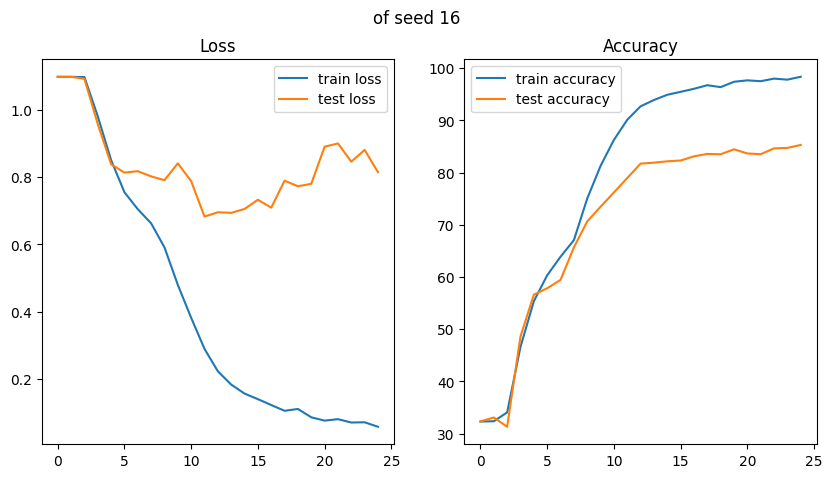

85.30585106382979


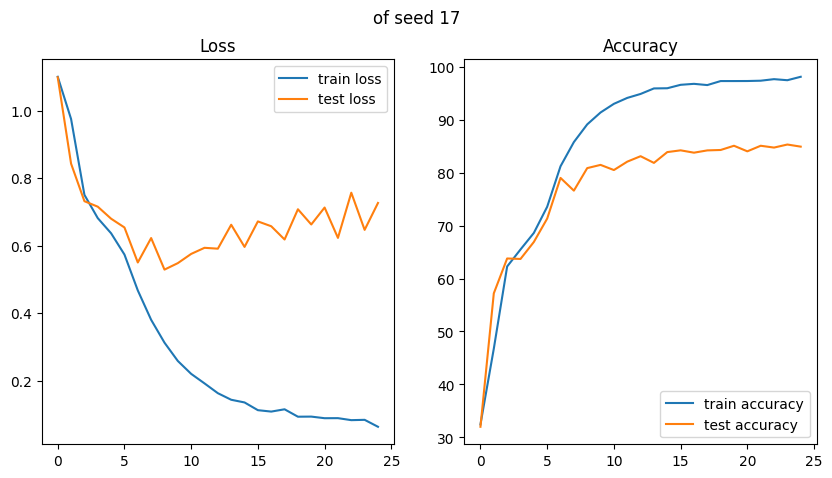

84.90691489361703


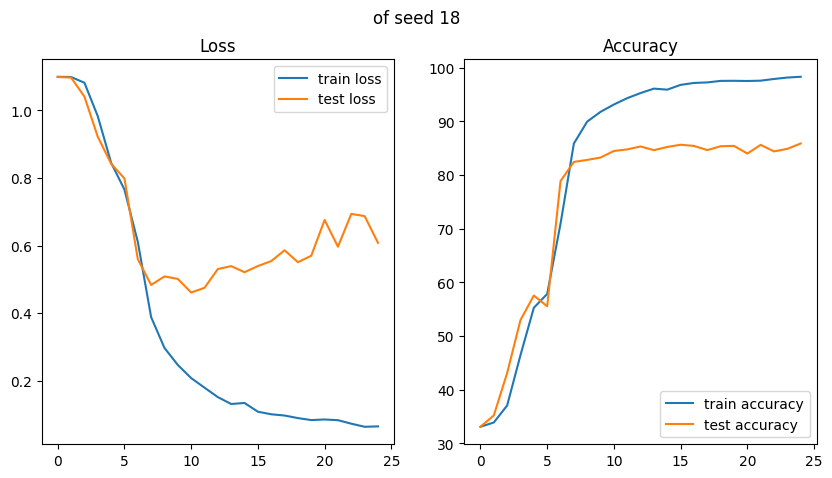

85.88209219858156


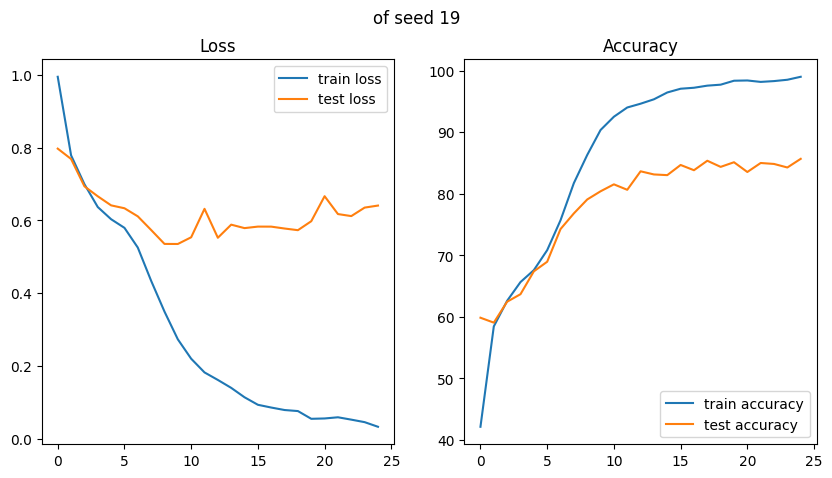

85.68262411347519


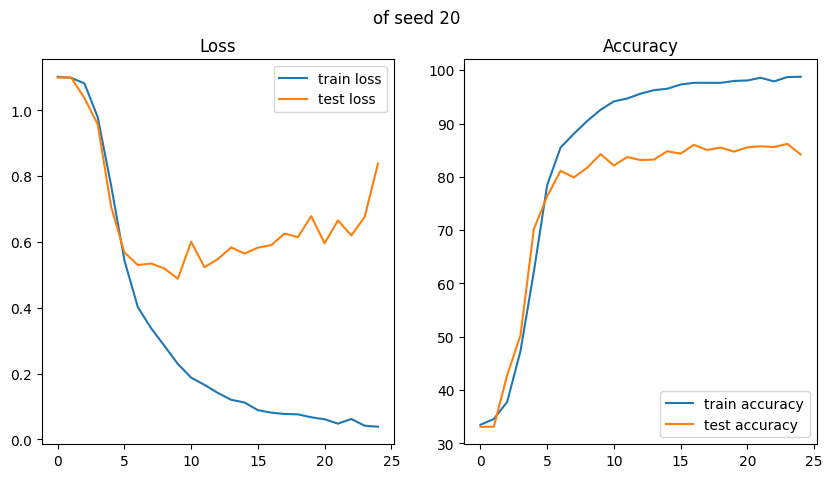

84.18661347517731


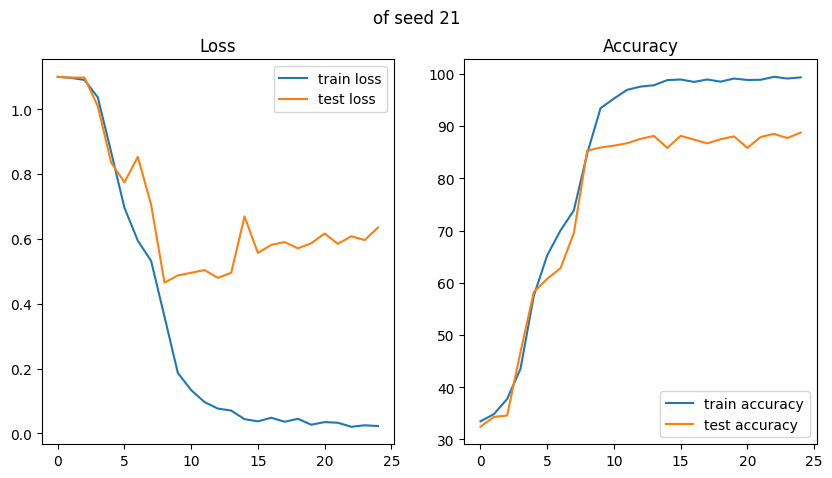

88.7854609929078


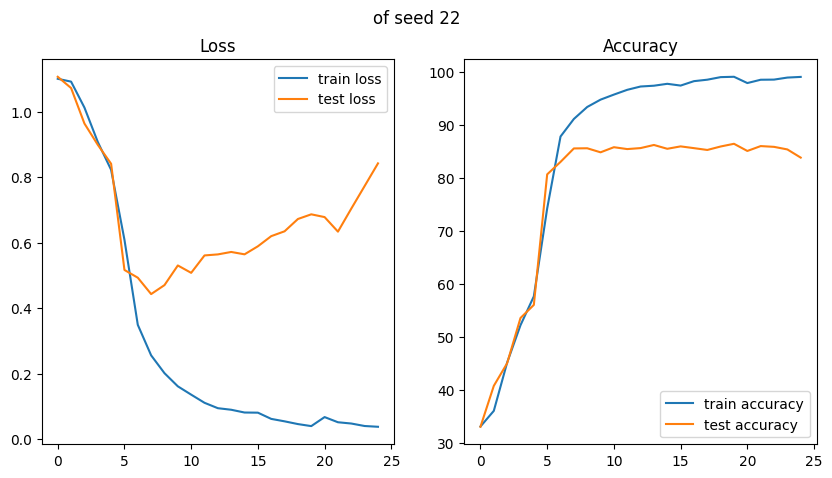

83.83200354609929


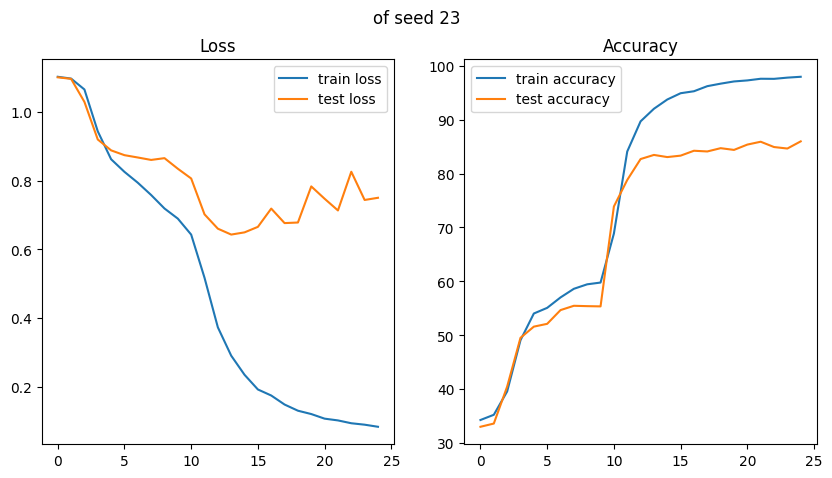

85.97074468085107


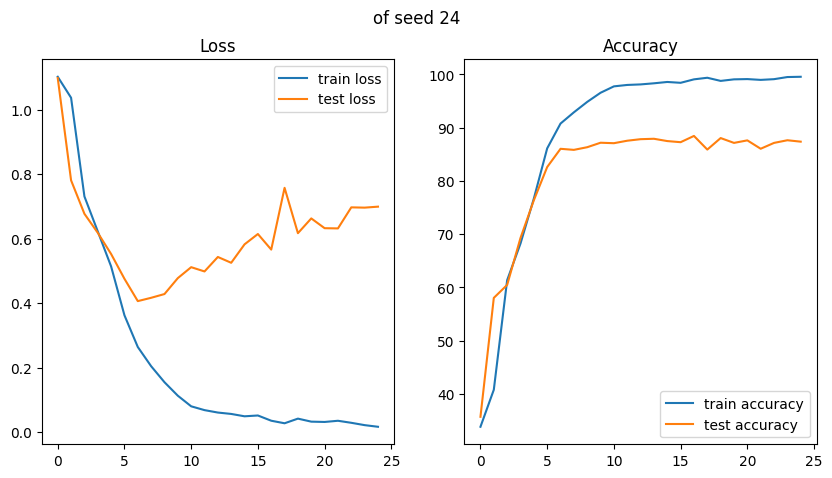

87.36702127659575


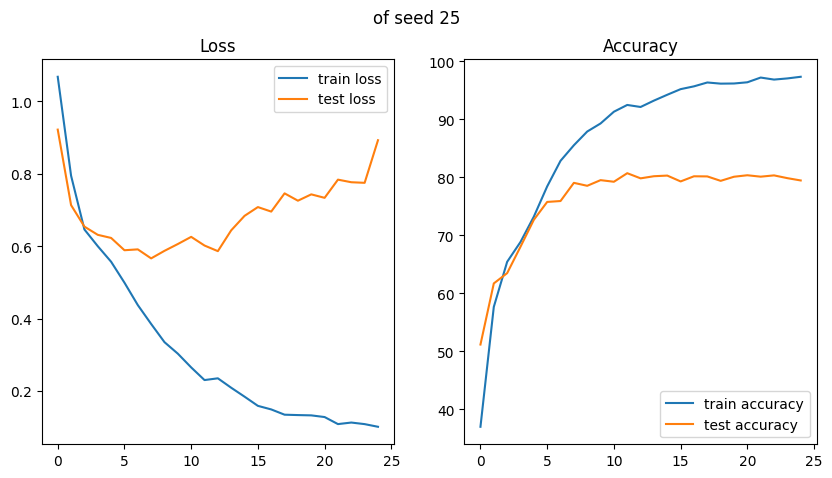

79.45478723404256


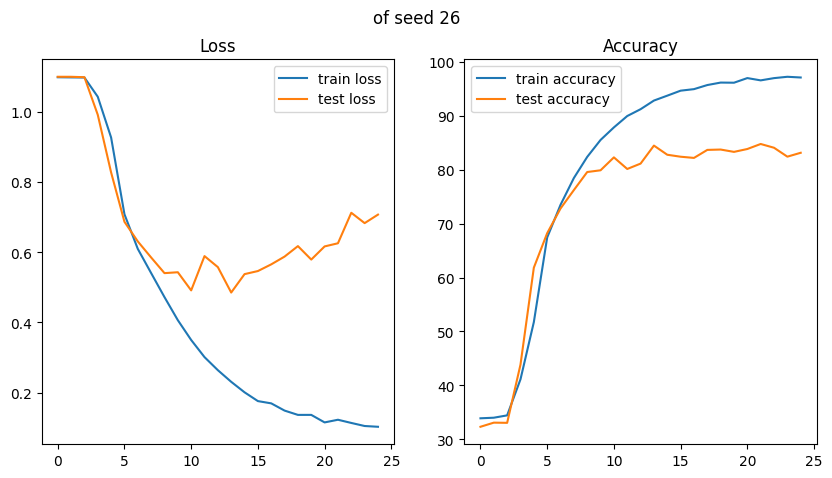

83.12278368794327


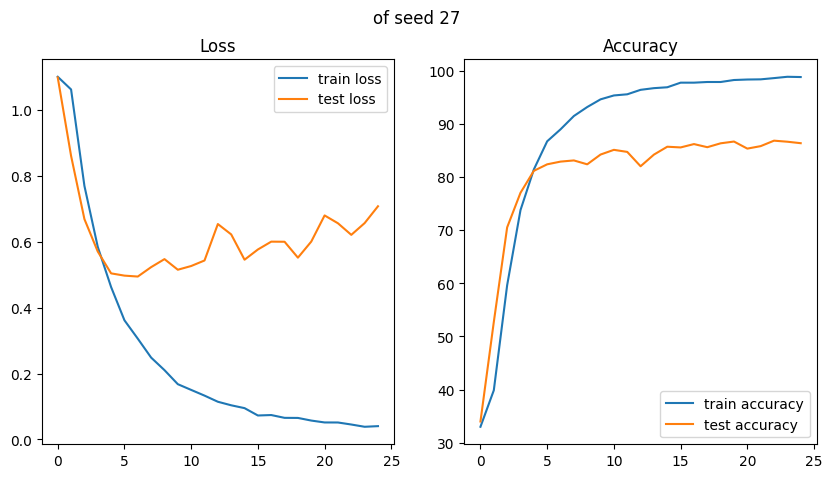

86.3918439716312


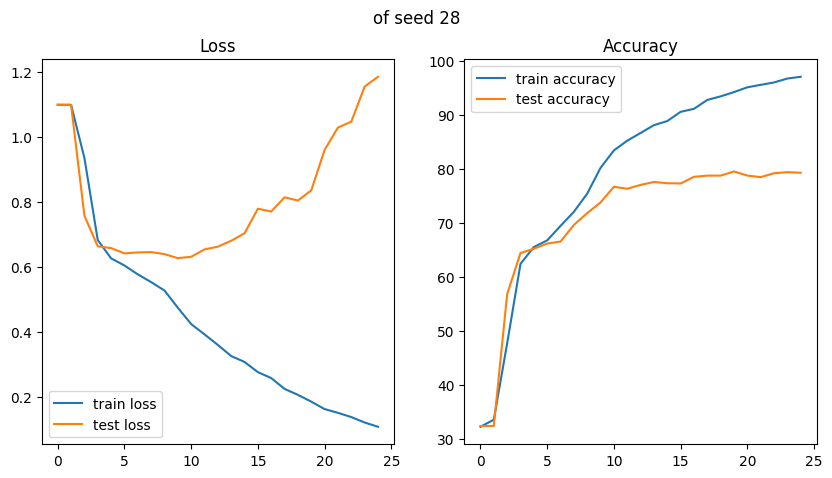

79.22207446808511


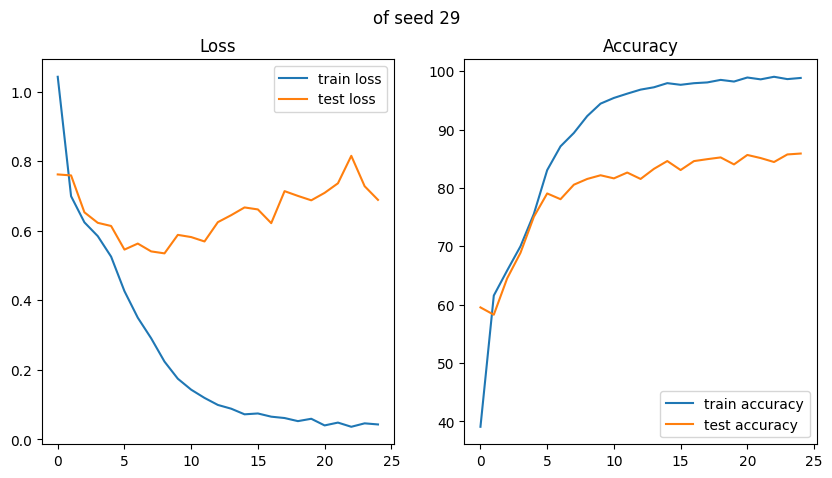

85.88209219858156


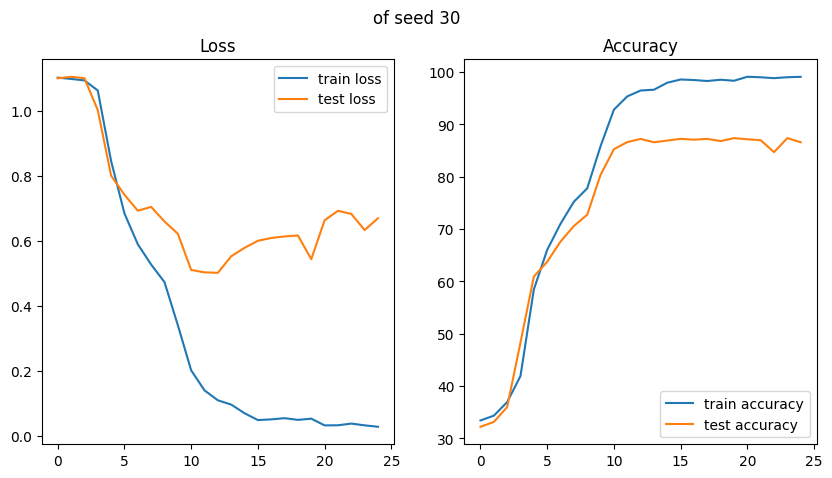

86.58023049645391


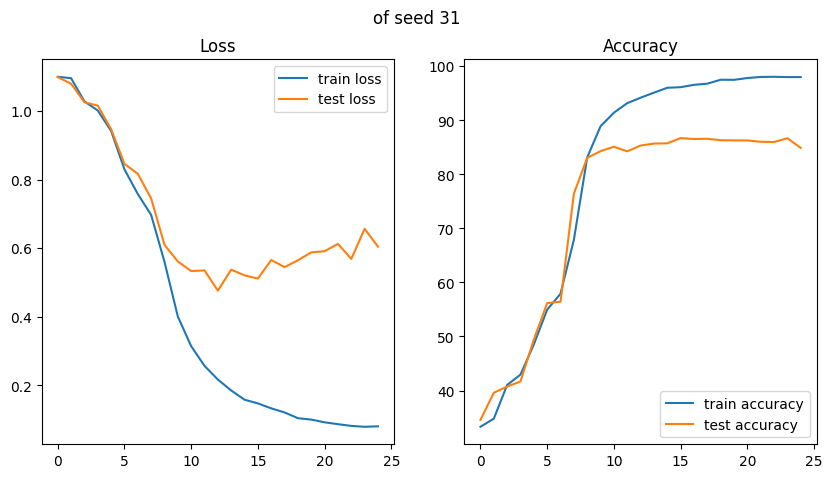

84.89583333333333


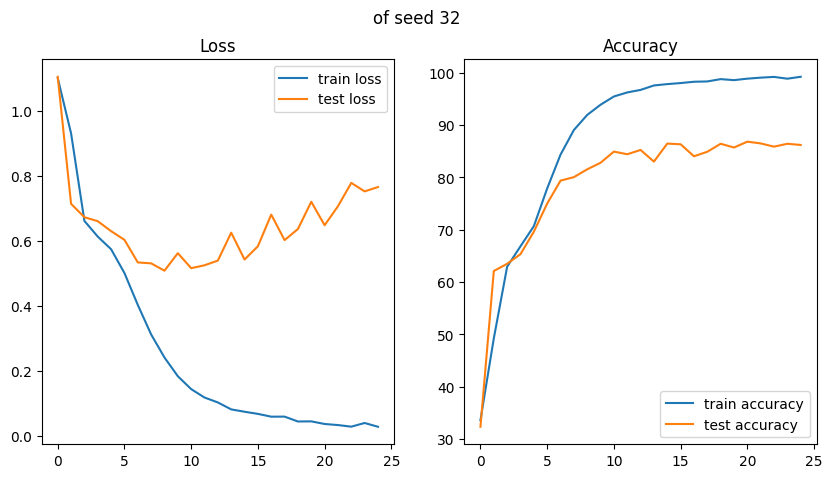

86.19237588652481


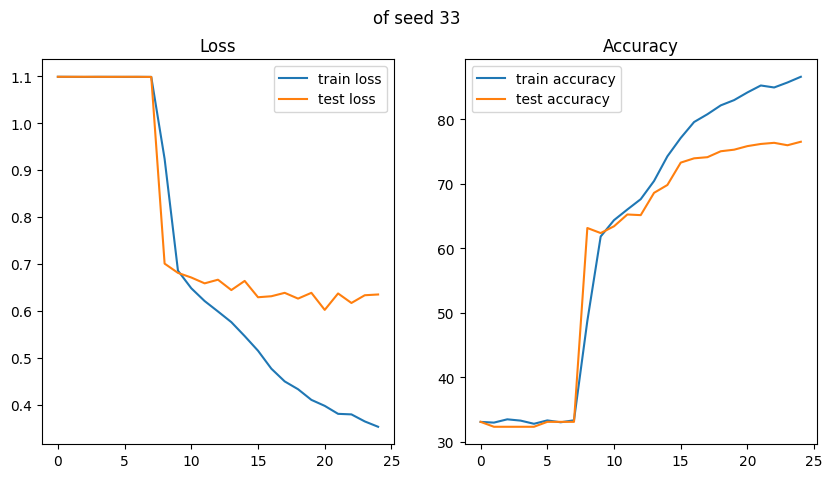

76.54033687943263


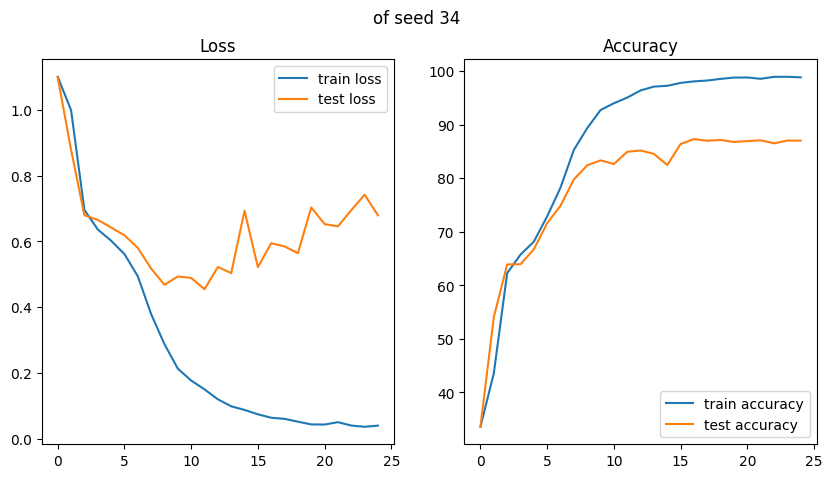

87.00132978723404


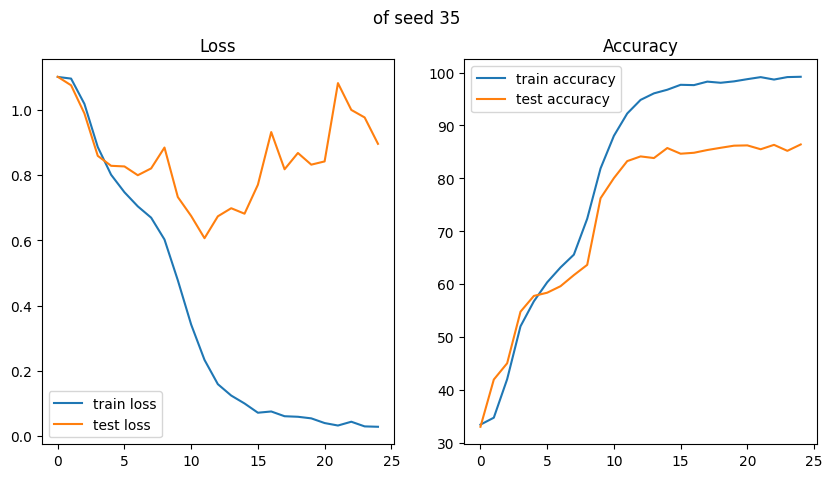

86.41400709219859


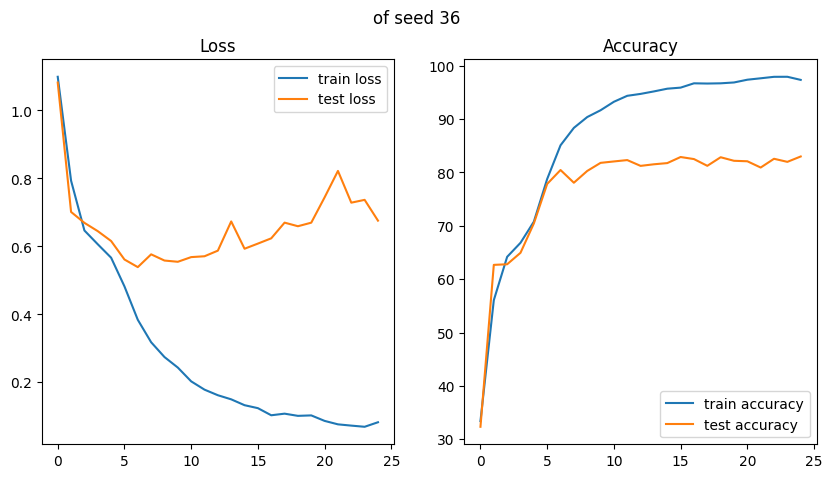

82.989804964539


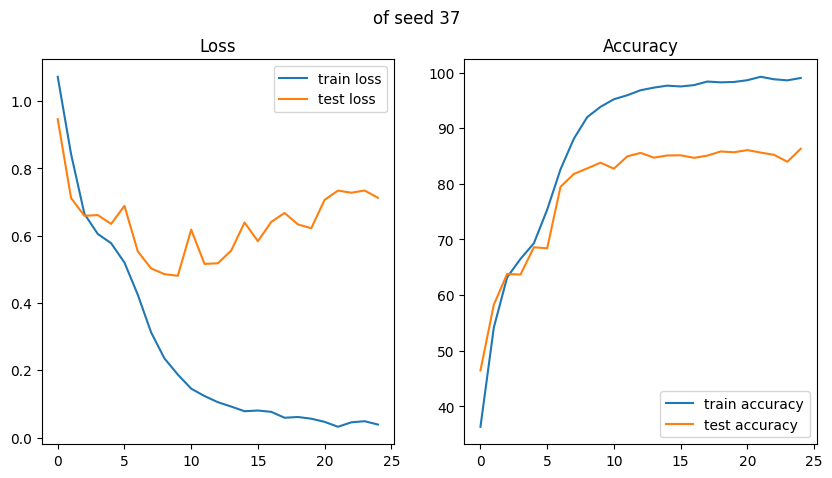

86.30319148936171


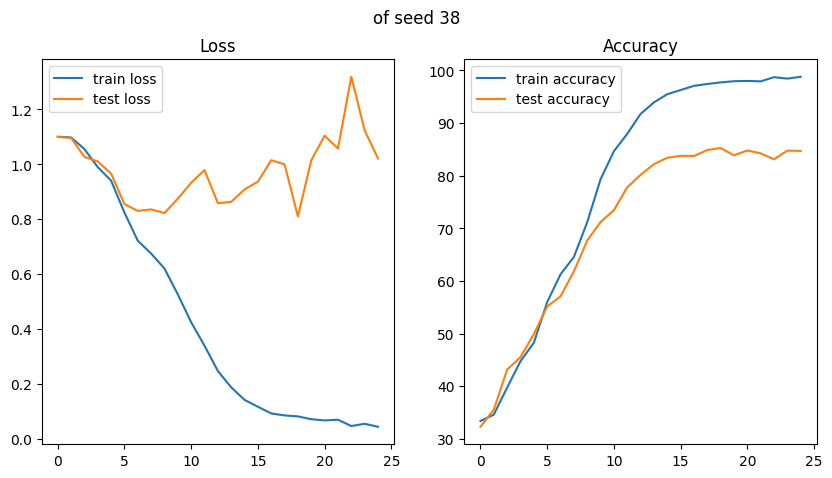

84.69636524822695


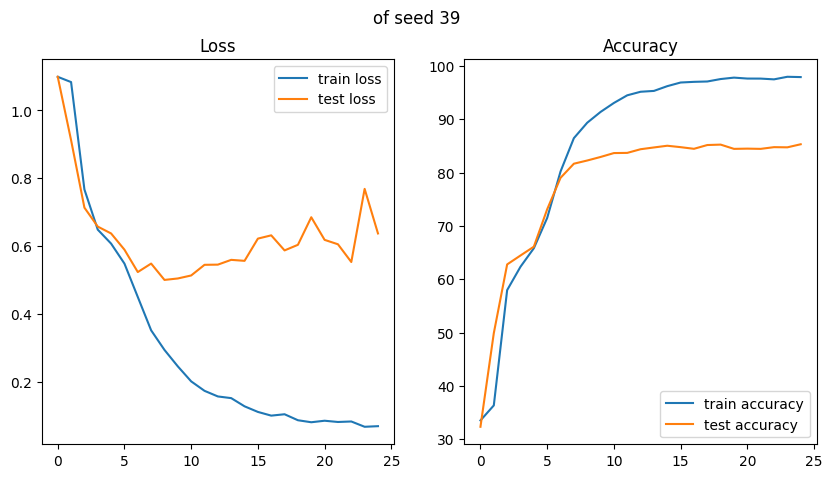

85.30585106382979


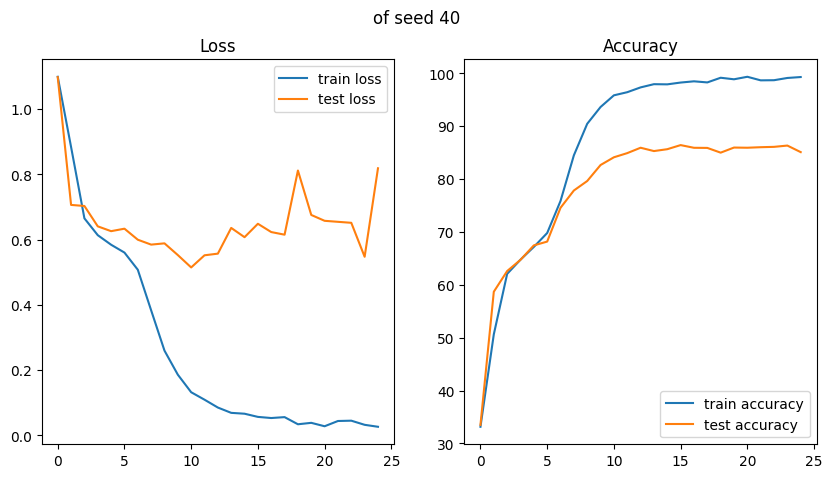

85.1063829787234


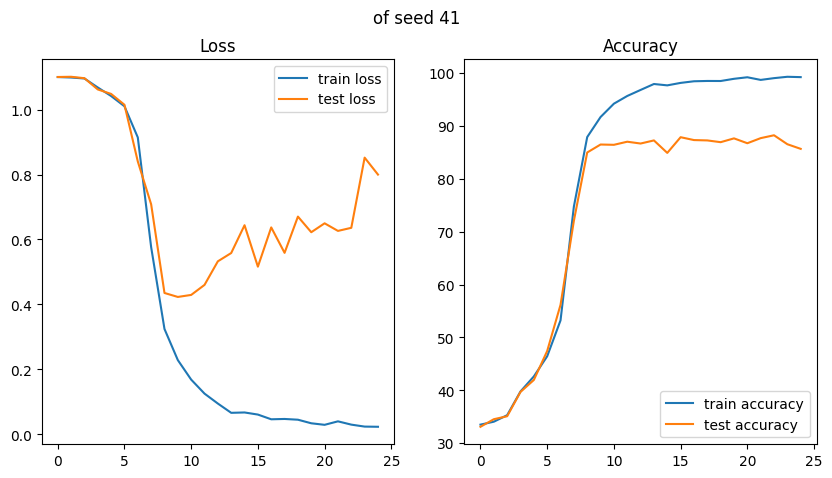

85.69370567375886


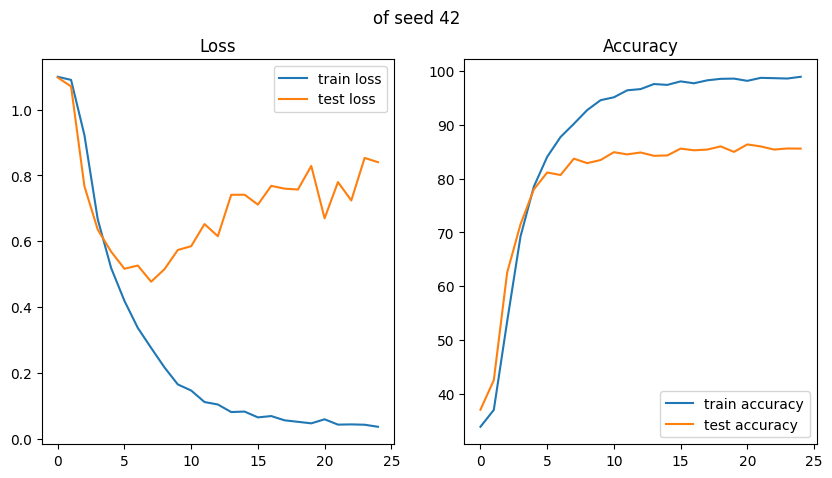

85.60505319148936


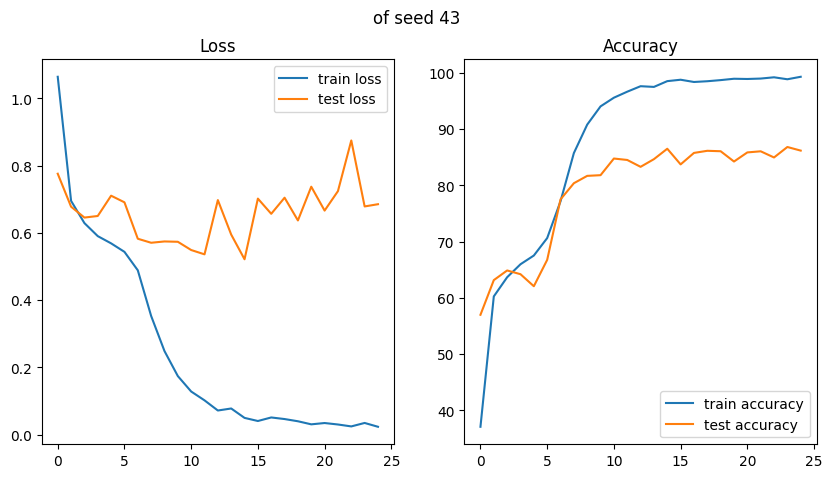

86.17021276595744


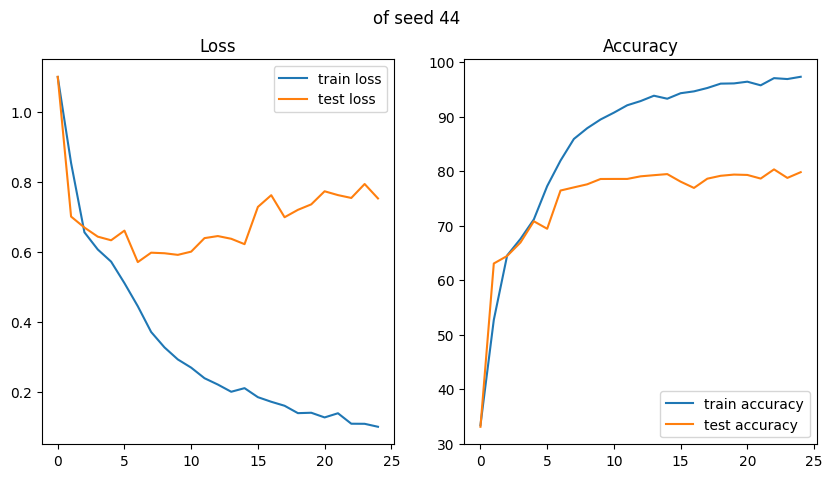

79.80939716312056


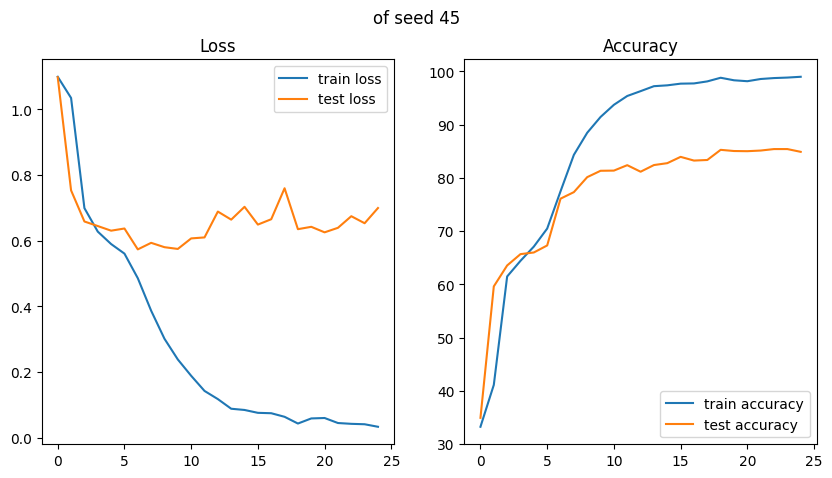

84.90691489361703


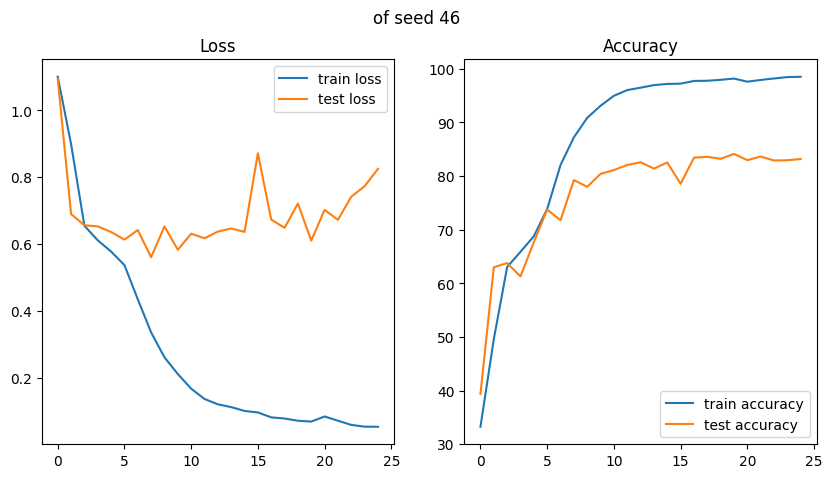

83.17819148936171


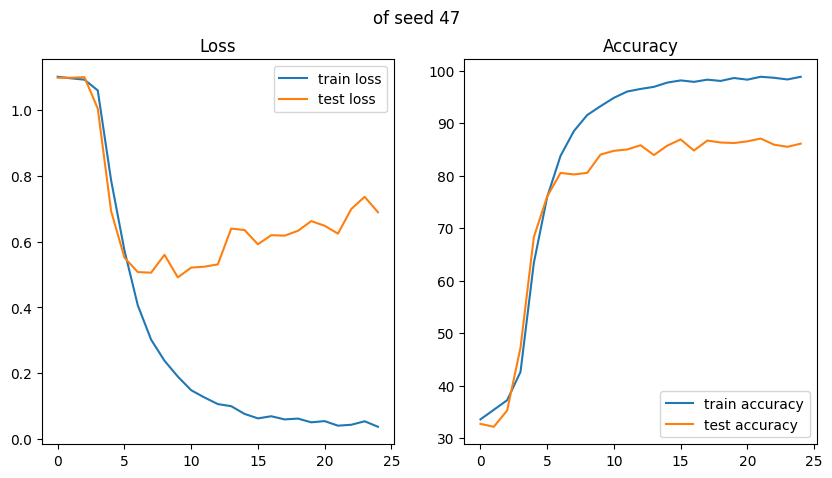

86.114804964539


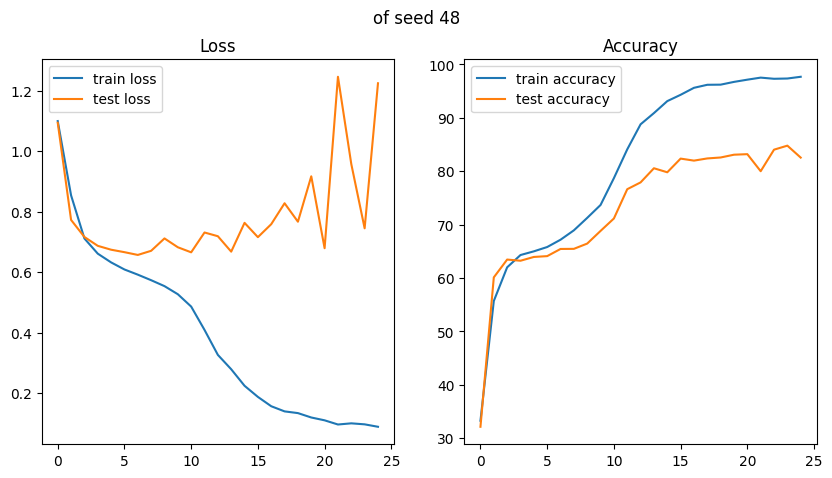

82.54654255319149


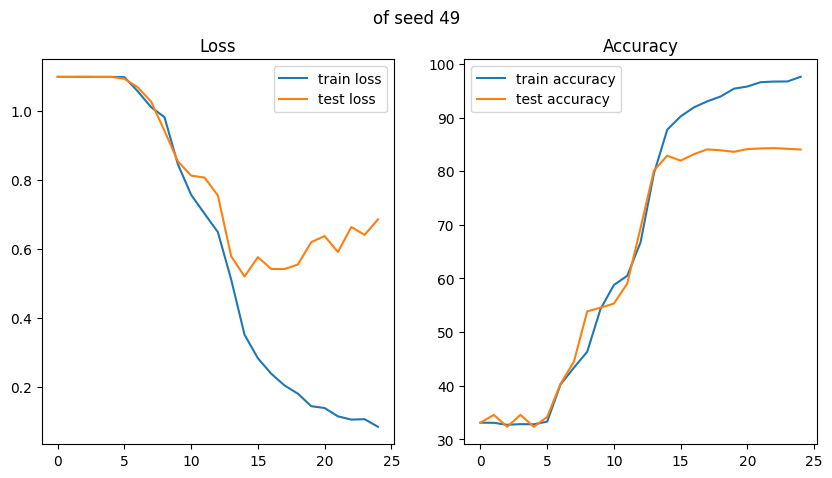

84.05363475177305


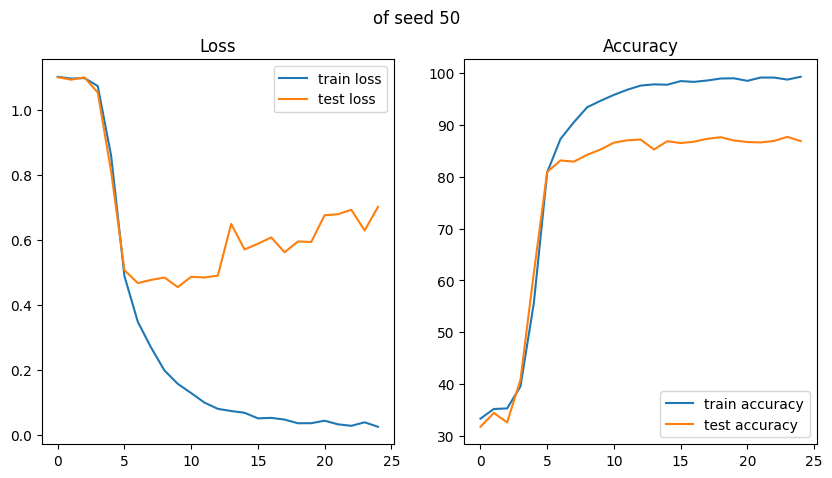

86.85726950354609


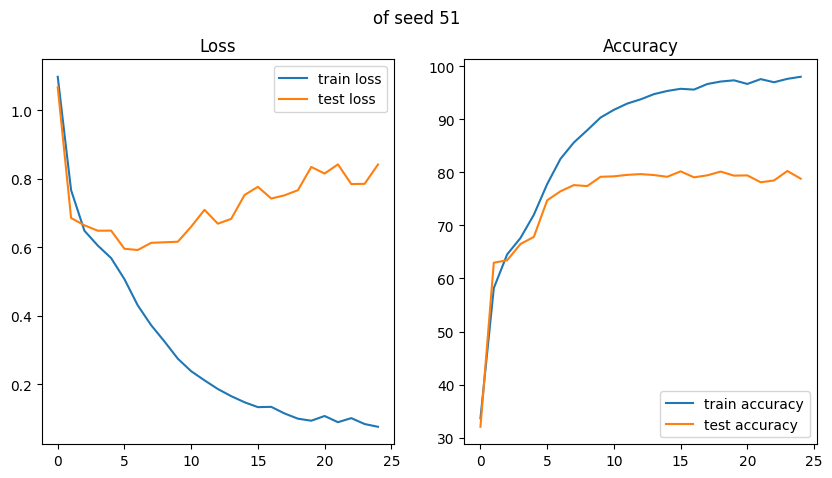

78.82313829787235


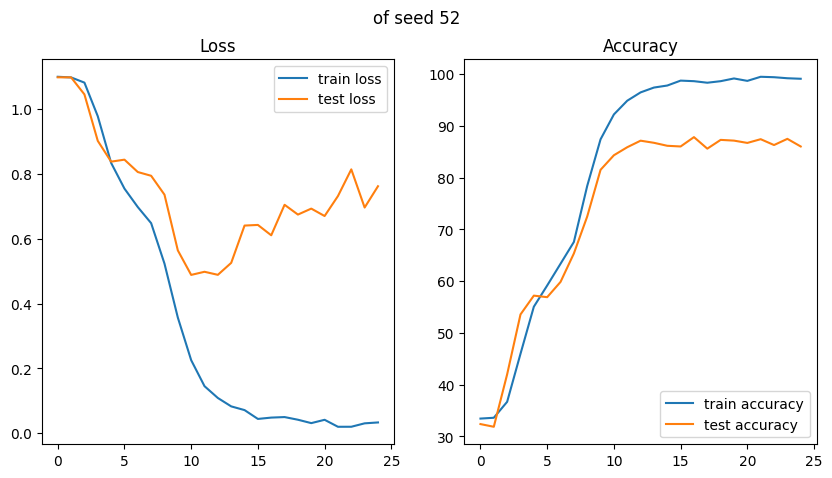

86.01507092198582


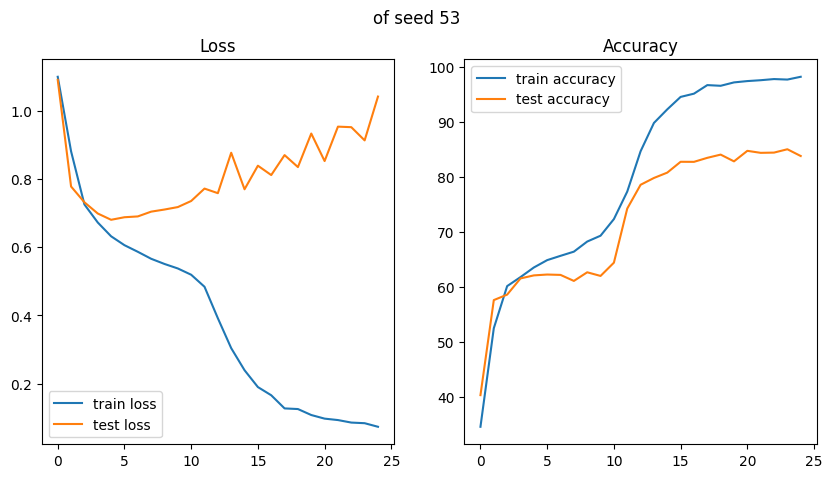

83.8209219858156


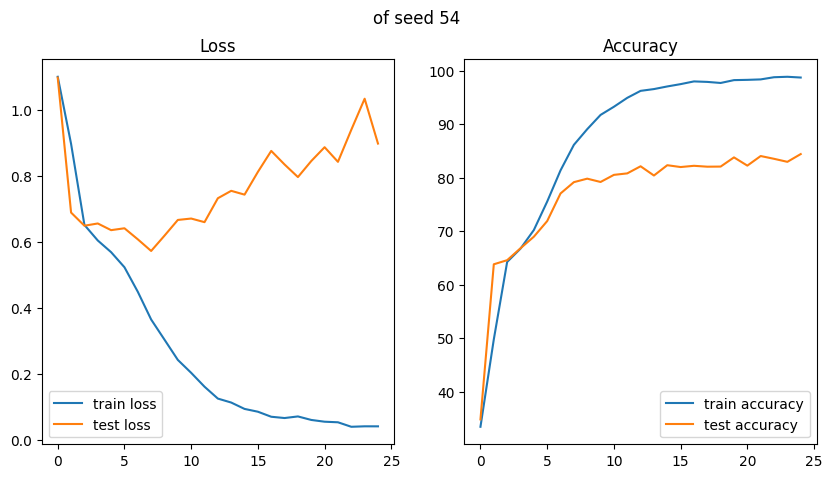

84.41932624113475


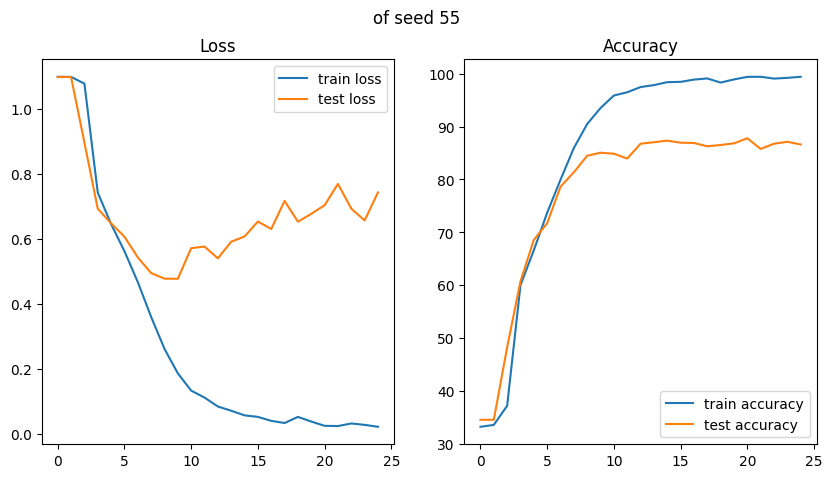

86.61347517730496


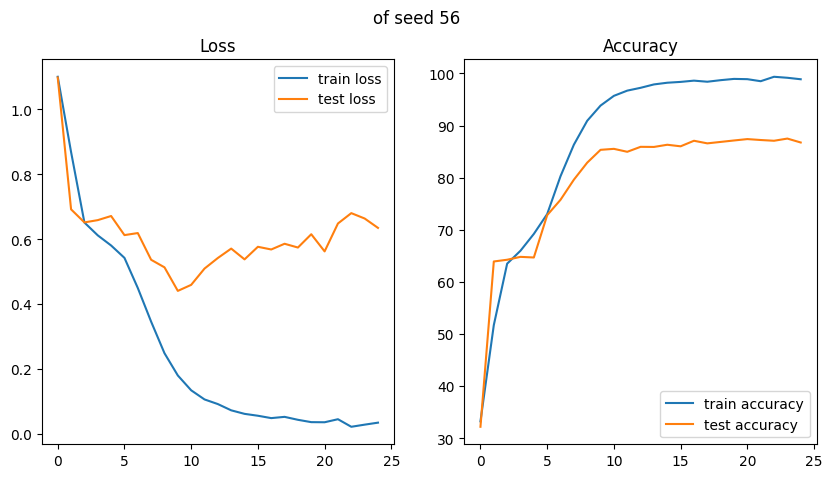

86.7575354609929


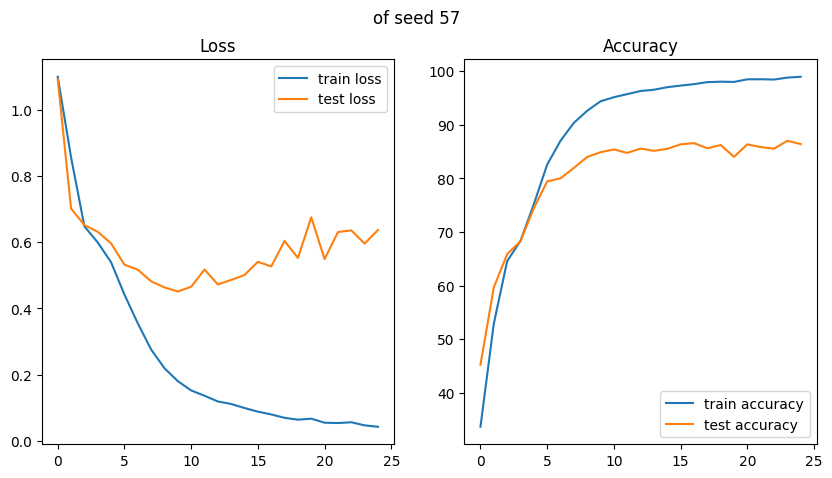

86.36968085106383


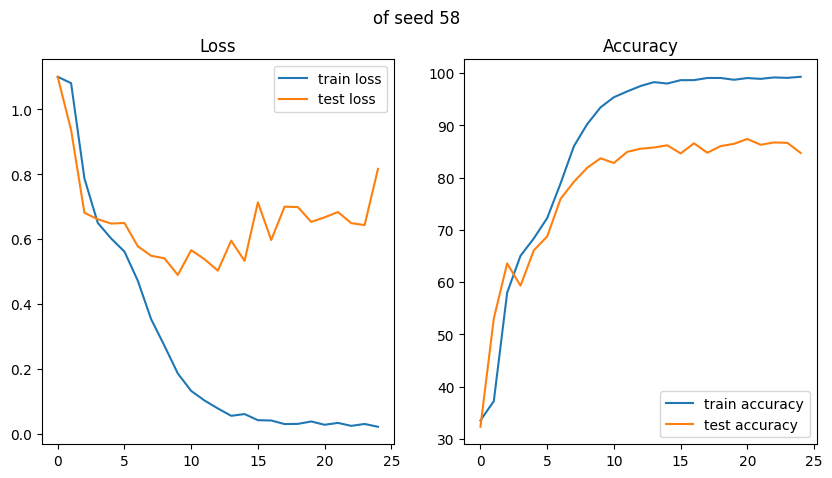

84.71852836879432


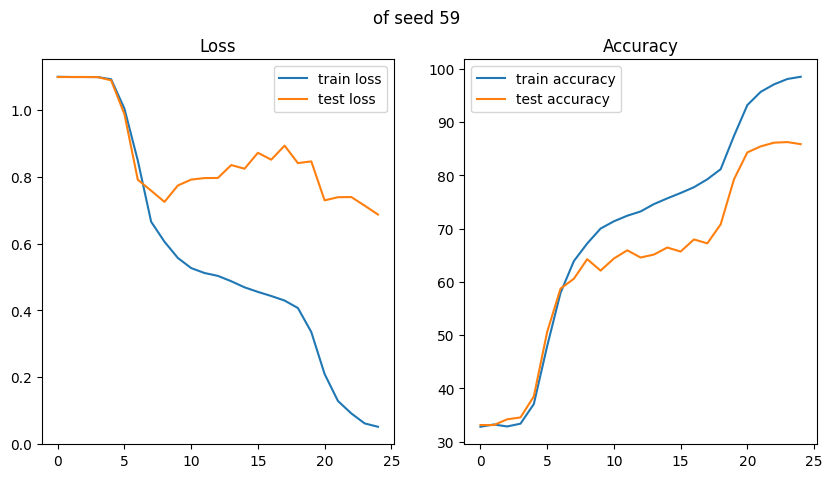

85.8488475177305


In [13]:
accuracy_seed_train,accuracy_seed_test,loss_seed_test,loss_seed_train = [],[],[],[]
import matplotlib.pyplot as plt
for i in range(60):
    q,w,e,r=model_train(train_dataloader, test_dataloader, i)
    loss_seed_train.append(q),loss_seed_test.append(w),accuracy_seed_train.append(e),accuracy_seed_test.append(r)
    # plot q,e as loss and e,r as accuracy  in collage
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f'of seed {i}')

    axs[0].plot(q, label='train loss')
    axs[0].plot(w, label='test loss')
    axs[0].legend()
    axs[0].set_title('Loss')
    axs[1].plot(e, label='train accuracy')
    axs[1].plot(r, label='test accuracy')
    axs[1].legend()
    axs[1].set_title('Accuracy')
    plt.show()
    print(r[-1])
    

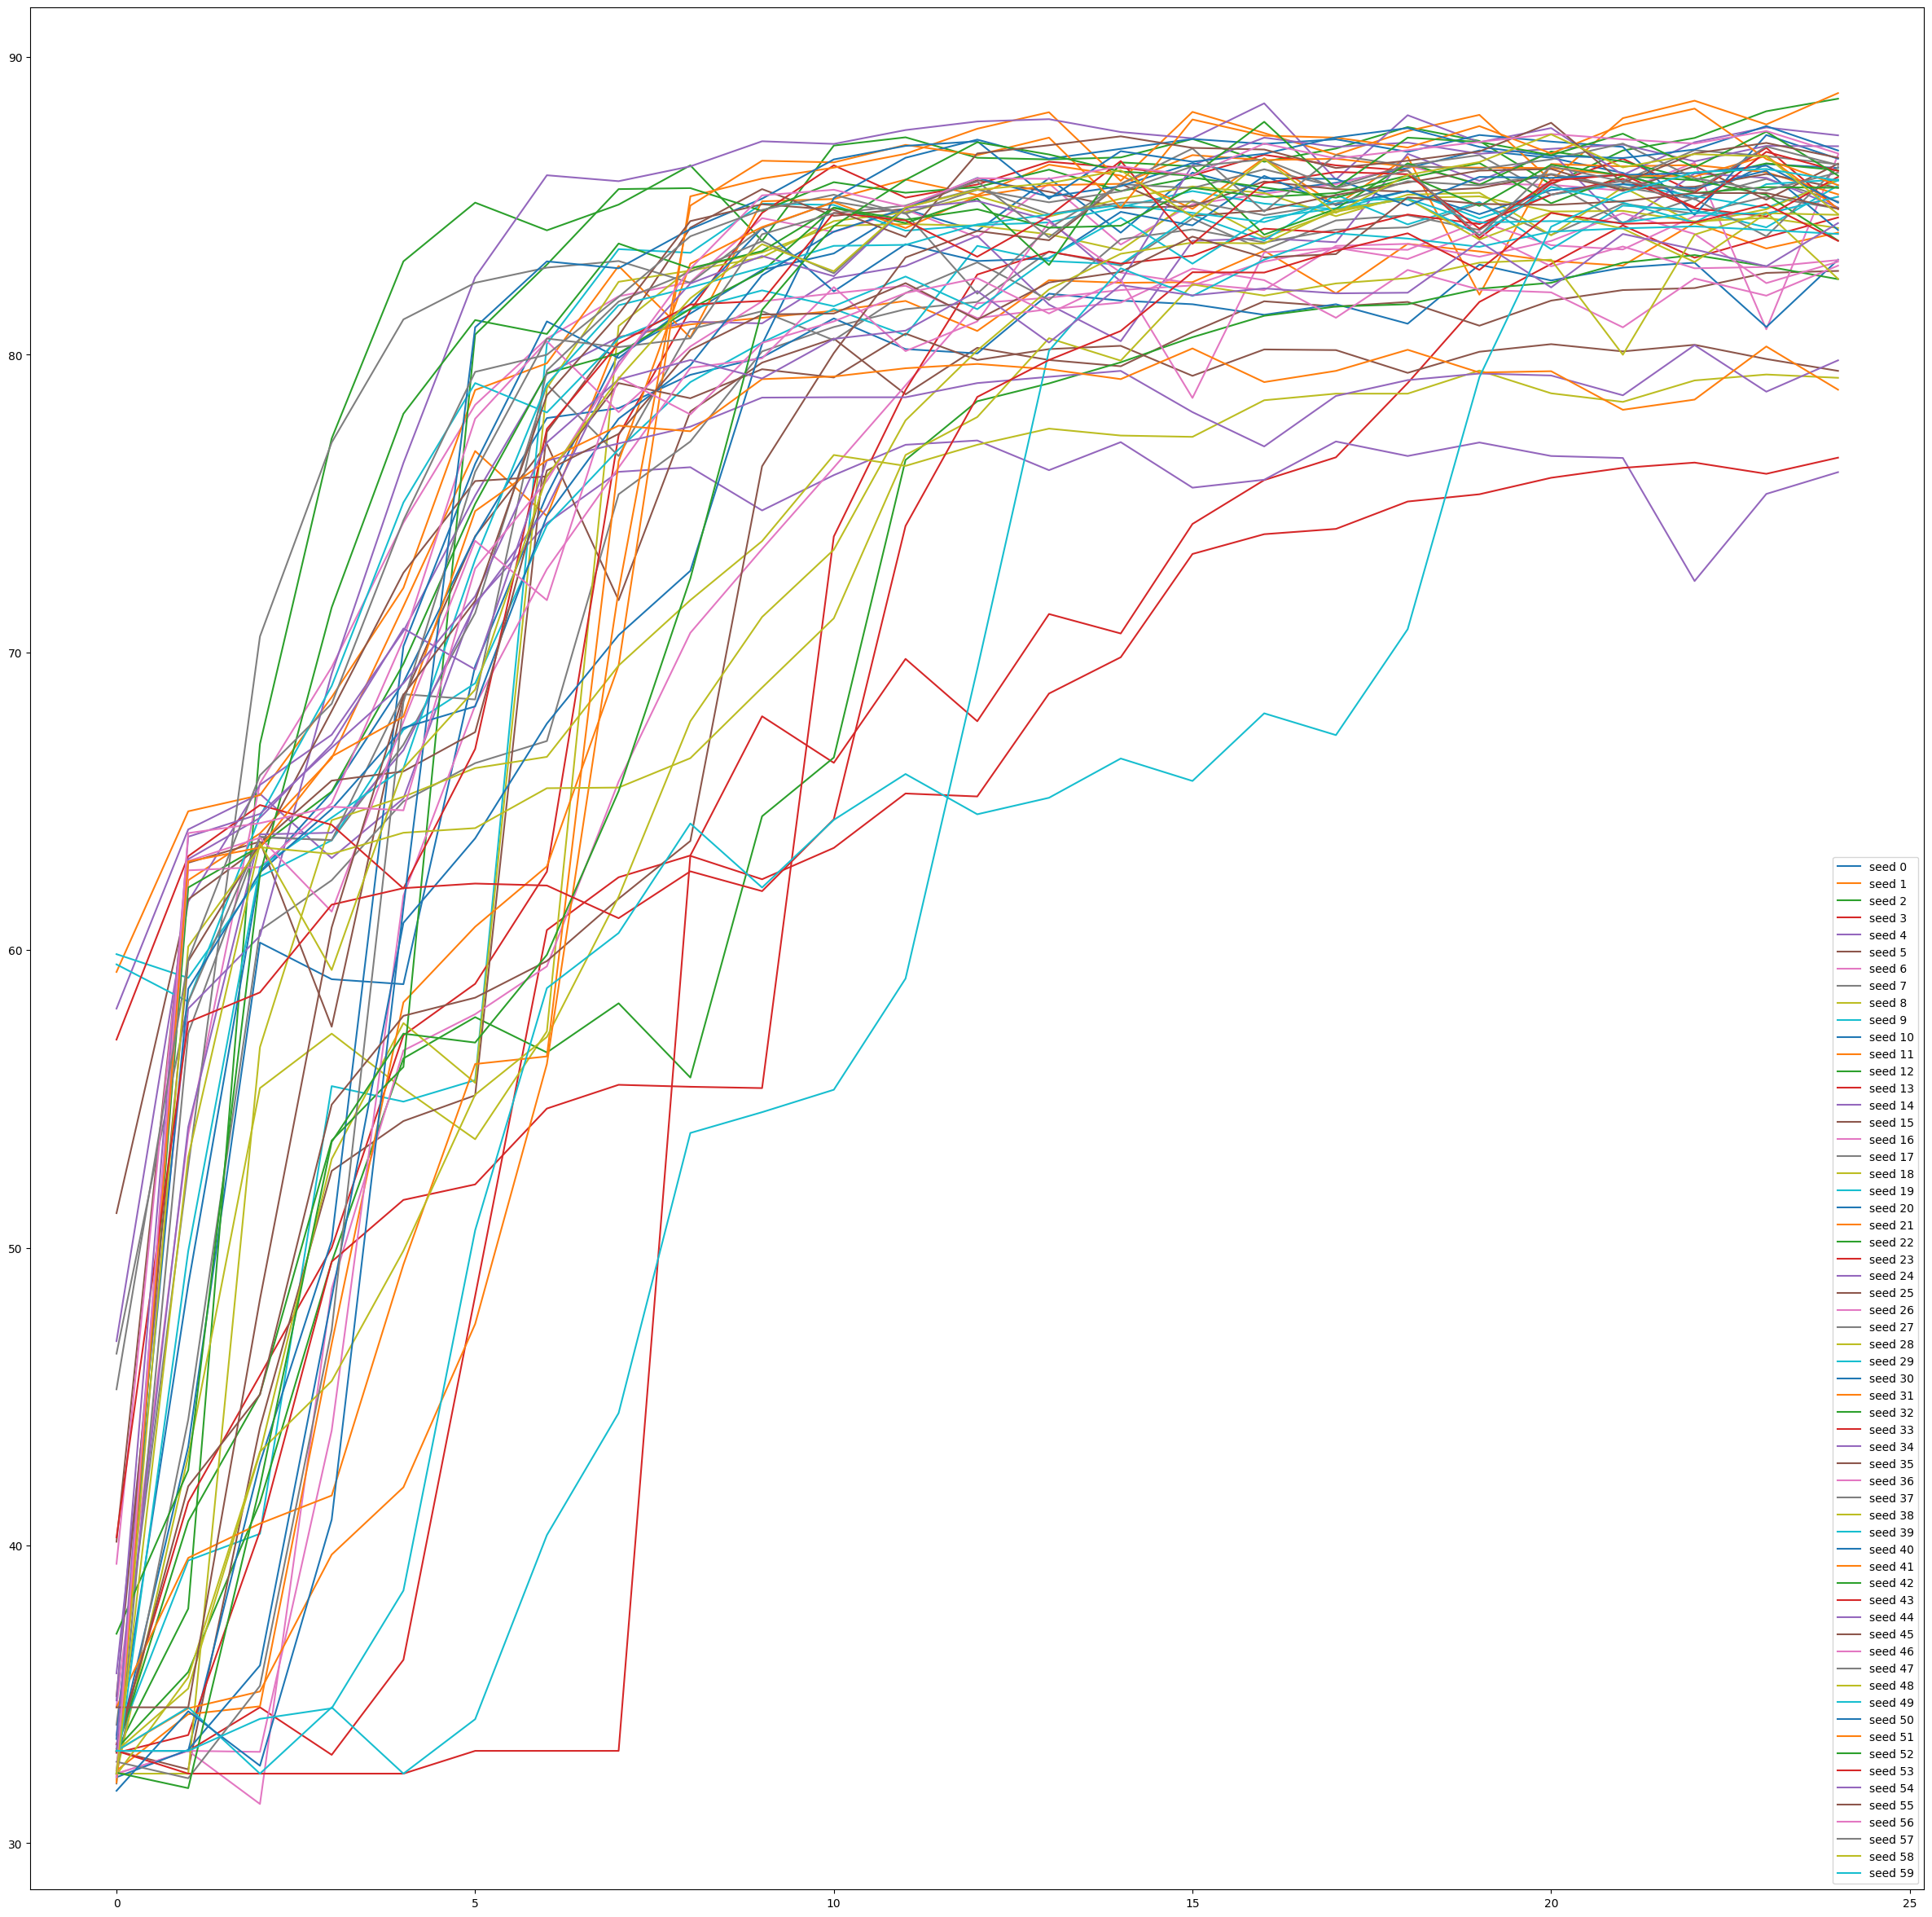

In [15]:
# accuracy_seed_test
fig=plt.figure(figsize=(30,30))
for i in range(60):
    plt.plot(accuracy_seed_test[i], label=f'seed {i}')
plt.legend()

## lahsan


In [14]:
# save all lisst as numpy array
np.save("accuracy_seed_train.npy",accuracy_seed_train)
np.save("accuracy_seed_test.npy",accuracy_seed_test)
np.save("loss_seed_test.npy",loss_seed_test)
np.save("loss_seed_train.npy",loss_seed_train)


In [13]:
# load the numpy array
accuracy_seed_train = np.load("accuracy_seed_train.npy")
accuracy_seed_test = np.load("accuracy_seed_test.npy")
loss_seed_test = np.load("loss_seed_test.npy")
loss_seed_train = np.load("loss_seed_train.npy")

In [46]:
# find max accuracy_seed_test[i][-1] and return the seed
max_acc = 0
max_seed = 0
for i in range(60):
    if accuracy_seed_test[i][-1]>max_acc:
        if accuracy_seed_test[i][-1]>max_acc:
        max_acc = accuracy_seed_test[i][-1]
        max_seed = i
print(f"max accuracy of {max_acc} is at seed {max_seed}")


max accuracy of 88.7854609929078 is at seed 21
